![dt](https://github.com/zotroneneis/machine_learning_basics/raw/c21753daa38c6f321a97942a721751ff7cbedd91/figures/decision_tree.png)

1. CART training algorithm
 - 基尼系数算法
 - $J(D,\Theta) = \frac{n_{left}}{n_{right}}G_{left} + \frac{n_{right}}{n_{left}}G_{right}$
 
 - $D$: remaining training examples
 - $n_{total}$ : number of remaining training examples
 - $\theta = (f, t_f)$: feature and feature threshold
 - $n_{left}/n_{right}$: number of samples in the left/right subset
 - $G_{left}/G_{right}$: Gini impurity of the left/right subset
 
2. Gini Impurity :Given $K$ different classification values $k \in \{1, ..., K\}$ the Gini impurity of node $m$ is computed as follows:

$$G_m = 1-\sum_{k=1}^{K} (p_{m,k})^2$$

In [1]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
np.random.seed(123)

% matplotlib inline

UsageError: Line magic function `%` not found.


In [2]:
# use iris dataset

iris = load_iris()

X, y = iris.data, iris.target

In [6]:
X[0],y[0],X.shape,y.shape

(array([5.1, 3.5, 1.4, 0.2]), 0, (150, 4), (150,))

In [7]:
# Split the data into a training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y)

print(f'Shape X_train: {X_train.shape}')
print(f'Shape y_train: {y_train.shape}')
print(f'Shape X_test: {X_test.shape}')
print(f'Shape y_test: {y_test.shape}')

Shape X_train: (112, 4)
Shape y_train: (112,)
Shape X_test: (38, 4)
Shape y_test: (38,)


In [8]:
# split data
def split_dataset(X, y, feature_idx, threshold):
    """
    Splits dataset X into two subsets, according to a given feature
    and feature threshold.

    Args:
        X: 2D numpy array with data samples
        y: 1D numpy array with labels
        feature_idx: int, index of feature used for splitting the data
        threshold: float, threshold used for splitting the data

    Returns:
        splits: dict containing the left and right subsets
        and their labels
    """

    left_idx = np.where(X[:, feature_idx] < threshold)
    right_idx = np.where(X[:, feature_idx] >= threshold)

    left_subset = X[left_idx]
    y_left = y[left_idx]

    right_subset = X[right_idx]
    y_right = y[right_idx]

    splits = {
    'left': left_subset,
    'y_left': y_left,
    'right': right_subset,
    'y_right': y_right,
    }

    return splits

# cost function
def get_cost(splits， n_classes):
    """
    Computes cost of a split given the Gini impurity of
    the left and right subset and the sizes of the subsets

    Args:
        splits: dict, containing params of current split,from split_dataset
    """
    y_left = splits['y_left']
    y_right = splits['y_right']

    n_left = len(y_left)
    n_right = len(y_right)
    n_total = n_left + n_right

    gini_left, gini_right = gini_impurity(y_left, y_right, n_left, n_right, n_classes)
    cost = (n_left / n_total) * gini_left + (n_right / n_total) * gini_right

    return cost

In [9]:
# compute gini index
def gini_impurity(y_left, y_right, n_left, n_right, n_classes):
    """
    Computes Gini impurity of a split.

    Args:
        y_left, y_right: target values of samples in left/right subset
        n_left, n_right: number of samples in left/right subset

    Returns:
        gini_left: float, Gini impurity of left subset
        gini_right: gloat, Gini impurity of right subset
        
        n_classes: class of dataset
    """
    
    n_total = n_left + n_right  # right+left

    score_left, score_right = 0, 0
    gini_left, gini_right = 0, 0

    if n_left != 0:
        for c in range(n_classes):
            # For each class c, compute fraction of samples with class c
            p_left = len(np.where(y_left == c)[0]) / n_left
            score_left += p_left * p_left
        gini_left = 1 - score_left

    if n_right != 0:
        for c in range(n_classes):
            p_right = len(np.where(y_right == c)[0]) / n_right
            score_right += p_right * p_right
        gini_right = 1 - score_right

    return gini_left, gini_right

In [10]:
# cost function
def get_cost(splits):
    """
    Computes cost of a split given the Gini impurity of
    the left and right subset and the sizes of the subsets

    Args:
        splits: dict, containing params of current split
    """
    y_left = splits['y_left']
    y_right = splits['y_right']

    n_left = len(y_left)
    n_right = len(y_right)
    n_total = n_left + n_right

    gini_left, gini_right = self.gini_impurity(y_left, y_right, n_left, n_right)
    cost = (n_left / n_total) * gini_left + (n_right / n_total) * gini_right

    return cost

In [11]:
class DecisionTree:
    """
    Decision tree for classification
    """

    def __init__(self):
        self.root_dict = None
        self.tree_dict = None

    def split_dataset(self, X, y, feature_idx, threshold):
        """
        Splits dataset X into two subsets, according to a given feature
        and feature threshold.

        Args:
            X: 2D numpy array with data samples
            y: 1D numpy array with labels
            feature_idx: int, index of feature used for splitting the data
            threshold: float, threshold used for splitting the data

        Returns:
            splits: dict containing the left and right subsets
            and their labels
        """

        left_idx = np.where(X[:, feature_idx] < threshold)
        right_idx = np.where(X[:, feature_idx] >= threshold)

        left_subset = X[left_idx]
        y_left = y[left_idx]

        right_subset = X[right_idx]
        y_right = y[right_idx]

        splits = {
        'left': left_subset,
        'y_left': y_left,
        'right': right_subset,
        'y_right': y_right,
        }

        return splits

    def gini_impurity(self, y_left, y_right, n_left, n_right):
        """
        Computes Gini impurity of a split.

        Args:
            y_left, y_right: target values of samples in left/right subset
            n_left, n_right: number of samples in left/right subset

        Returns:
            gini_left: float, Gini impurity of left subset
            gini_right: gloat, Gini impurity of right subset
        """

        n_total = n_left + n_left

        score_left, score_right = 0, 0
        gini_left, gini_right = 0, 0

        if n_left != 0:
            for c in range(self.n_classes):
                # For each class c, compute fraction of samples with class c
                p_left = len(np.where(y_left == c)[0]) / n_left
                score_left += p_left * p_left
            gini_left = 1 - score_left

        if n_right != 0:
            for c in range(self.n_classes):
                p_right = len(np.where(y_right == c)[0]) / n_right
                score_right += p_right * p_right
            gini_right = 1 - score_right

        return gini_left, gini_right

    def get_cost(self, splits):
        """
        Computes cost of a split given the Gini impurity of
        the left and right subset and the sizes of the subsets
        
        Args:
            splits: dict, containing params of current split
        """
        y_left = splits['y_left']
        y_right = splits['y_right']

        n_left = len(y_left)
        n_right = len(y_right)
        n_total = n_left + n_right

        gini_left, gini_right = self.gini_impurity(y_left, y_right, n_left, n_right)
        cost = (n_left / n_total) * gini_left + (n_right / n_total) * gini_right

        return cost

    def find_best_split(self, X, y):
        """
        Finds the best feature and feature index to split dataset X into
        two groups. Checks every value of every attribute as a candidate
        split.

        Args:
            X: 2D numpy array with data samples
            y: 1D numpy array with labels

        Returns:
            best_split_params: dict, containing parameters of the best split
        """

        n_samples, n_features = X.shape

        best_feature_idx, best_threshold, best_cost, best_splits = np.inf, np.inf, np.inf, None

        for feature_idx in range(n_features):
            for i in range(n_samples):
                current_sample = X[i]
                threshold = current_sample[feature_idx]
                splits = self.split_dataset(X, y, feature_idx, threshold)
                cost = self.get_cost(splits)

                if cost < best_cost:
                    best_feature_idx = feature_idx
                    best_threshold = threshold
                    best_cost = cost
                    best_splits = splits

        best_split_params = {
            'feature_idx': best_feature_idx,
            'threshold': best_threshold,
            'cost': best_cost,
            'left': best_splits['left'],
            'y_left': best_splits['y_left'],
            'right': best_splits['right'],
            'y_right': best_splits['y_right'],
        }

        return best_split_params


    def build_tree(self, node_dict, depth, max_depth, min_samples):
        """
        Builds the decision tree in a recursive fashion.

        Args:
            node_dict: dict, representing the current node
            depth: int, depth of current node in the tree
            max_depth: int, maximum allowed tree depth
            min_samples: int, minimum number of samples needed to split a node further

        Returns:
            node_dict: dict, representing the full subtree originating from current node
        """
        left_samples = node_dict['left']
        right_samples = node_dict['right']
        y_left_samples = node_dict['y_left']
        y_right_samples = node_dict['y_right']

        if len(y_left_samples) == 0 or len(y_right_samples) == 0:
            node_dict["left_child"] = node_dict["right_child"] = self.create_terminal_node(np.append(y_left_samples, y_right_samples))
            return None

        if depth >= max_depth:
            node_dict["left_child"] = self.create_terminal_node(y_left_samples)
            node_dict["right_child"] = self.create_terminal_node(y_right_samples)
            return None

        if len(right_samples) < min_samples:
            node_dict["right_child"] = self.create_terminal_node(y_right_samples)
        else:
            node_dict["right_child"] = self.find_best_split(right_samples, y_right_samples)
            self.build_tree(node_dict["right_child"], depth+1, max_depth, min_samples)

        if len(left_samples) < min_samples:
            node_dict["left_child"] = self.create_terminal_node(y_left_samples)
        else:
            node_dict["left_child"] = self.find_best_split(left_samples, y_left_samples)
            self.build_tree(node_dict["left_child"], depth+1, max_depth, min_samples)

        return node_dict

    def create_terminal_node(self, y):
        """
        Creates a terminal node.
        Given a set of labels the most common label is computed and
        set as the classification value of the node.

        Args:
            y: 1D numpy array with labels
        Returns:
            classification: int, predicted class
        """
        classification = max(set(y), key=list(y).count)
        return classification

    def train(self, X, y, max_depth, min_samples):
        """
        Fits decision tree on a given dataset.

        Args:
            X: 2D numpy array with data samples
            y: 1D numpy array with labels
            max_depth: int, maximum allowed tree depth
            min_samples: int, minimum number of samples needed to split a node further
        """
        self.n_classes = len(set(y))
        self.root_dict = self.find_best_split(X, y)
        self.tree_dict = self.build_tree(self.root_dict, 1, max_depth, min_samples)

    def predict(self, X, node):
        """
        Predicts the class for a given input example X.

        Args:
            X: 1D numpy array, input example
            node: dict, representing trained decision tree

        Returns:
            prediction: int, predicted class
        """
        feature_idx = node['feature_idx']
        threshold = node['threshold']

        if X[feature_idx] < threshold:
            if isinstance(node['left_child'], (int, np.integer)):
                return node['left_child']
            else:
                prediction = self.predict(X, node['left_child'])
        elif X[feature_idx] >= threshold:
            if isinstance(node['right_child'], (int, np.integer)):
                return node['right_child']
            else:
                prediction = self.predict(X, node['right_child'])

        return prediction

In [12]:
tree = DecisionTree()
tree.train(X_train, y_train, max_depth=2, min_samples=1)

In [13]:
def print_tree(node, depth=0):
    if isinstance(node, (int, np.integer)):
        print(f"{depth * '  '}predicted class: {iris.target_names[node]}")
    else:
        print(f"{depth * '  '}{iris.feature_names[node['feature_idx']]} < {node['threshold']}, "
             f"cost of split: {round(node['cost'], 3)}")
        print_tree(node["left_child"], depth+1)
        print_tree(node["right_child"], depth+1)
              

print_tree(tree.tree_dict)

petal length (cm) < 3.0, cost of split: 0.346
  sepal length (cm) < 5.4, cost of split: 0.0
    predicted class: setosa
    predicted class: setosa
  petal width (cm) < 1.8, cost of split: 0.097
    predicted class: versicolor
    predicted class: virginica


In [14]:
all_predictions = []
for i in range(X_test.shape[0]):
    result = tree.predict(X_test[i], tree.tree_dict)
    all_predictions.append(y_test[i] == result)

print(f"Accuracy on test set: {sum(all_predictions) / len(all_predictions)}")

Accuracy on test set: 0.9473684210526315


# use sklearn model
https://github.com/machinelearningmindset/machine-learning-course/blob/master/docs/source/content/supervised/decisiontrees.rst
![tartge](https://github.com/machinelearningmindset/machine-learning-course/raw/master/docs/source/content/supervised/_img/shopping_table.png)

This process is repeated until all nodes have the same value as the target result, or splitting adds no value to a prediction. This algorithm has the root node as the best classifier.

gini impurity function
![a](https://github.com/machinelearningmindset/machine-learning-course/raw/master/docs/source/content/supervised/_img/Gini_Impurity.png)

cost function:
![s](https://github.com/machinelearningmindset/machine-learning-course/raw/master/docs/source/content/supervised/_img/Gini_Information_Gain.png)

In [1]:
import graphviz
import itertools
import random 
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.preprocessing import OneHotEncoder

In [3]:
# The possible values for each class 
classes = {
    'supplies': ['low', 'med', 'high'],
    'weather':  ['raining', 'cloudy', 'sunny'],
    'worked?':  ['yes', 'no']
}

# Our example data from the documentation
data = [
    ['low',  'sunny',   'yes'],
    ['high', 'sunny',   'yes'],
    ['med',  'cloudy',  'yes'],
    ['low',  'raining', 'yes'],
    ['low',  'cloudy',  'no' ],
    ['high', 'sunny',   'no' ],
    ['high', 'raining', 'no' ],
    ['med',  'cloudy',  'yes'],
    ['low',  'raining', 'yes'],
    ['low',  'raining', 'no' ],
    ['med',  'sunny',   'no' ],
    ['high', 'sunny',   'yes']
]
# Our target variable, whether someone went shopping
target = ['yes', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'yes', 'yes', 'no']

In [4]:
# Scikit learn can't handle categorical data, so form numeric representations of the above data
# Categorical data support may be added in the future: https://github.com/scikit-learn/scikit-learn/pull/4899
categories = [classes['supplies'], classes['weather'], classes['worked?']]
encoder = OneHotEncoder(categories=categories)

In [11]:
x_data = encoder.fit_transform(data)
encoder, x_data

(OneHotEncoder(categories=[['low', 'med', 'high'],
                           ['raining', 'cloudy', 'sunny'], ['yes', 'no']],
               drop=None, dtype=<class 'numpy.float64'>, handle_unknown='error',
               sparse=True),
 <12x8 sparse matrix of type '<class 'numpy.float64'>'
 	with 36 stored elements in Compressed Sparse Row format>)

In [12]:
# Form and fit our decision tree to the now-encoded data
classifier = DecisionTreeClassifier()
tree = classifier.fit(x_data, target)

In [13]:
# Now that we have our decision tree, let's predict some outcomes from random data
# This goes through each class and builds a random set of 5 data points
prediction_data = []
for _ in itertools.repeat(None, 5):
    prediction_data.append([
        random.choice(classes['supplies']),
        random.choice(classes['weather']),
        random.choice(classes['worked?'])
    ])

# Use our tree to predict the outcome of the random values
prediction_results = tree.predict(encoder.transform(prediction_data))

In [14]:
# output
def format_array(arr):
    return "".join(["| {:<10}".format(item) for item in arr])

def print_table(data, results):
    line = "day  " + format_array(list(classes.keys()) + ["went shopping?"])
    print("-" * len(line))
    print(line)
    print("-" * len(line))

    for day, row in enumerate(data):
        print("{:<5}".format(day + 1) + format_array(row + [results[day]]))
    print("")

feature_names = (
    ['supplies-' + x for x in classes["supplies"]] +
    ['weather-' + x for x in classes["weather"]] +
    ['worked-' + x for x in classes["worked?"]]
)

In [15]:
# Shows a visualization of the decision tree using graphviz
# Note that sklearn is unable to generate non-binary trees, so these are based on individual options in each class
dot_data = export_graphviz(tree, filled=True, proportion=True, feature_names=feature_names) 
graph = graphviz.Source(dot_data)
graph.render(filename='decision_tree', cleanup=True, view=True)

# Display out training and prediction data and results
print("Training Data:")
print_table(data, target)

print("Predicted Random Results:")
print_table(prediction_data, prediction_results)

Training Data:
---------------------------------------------------------
day  | supplies  | weather   | worked?   | went shopping?
---------------------------------------------------------
1    | low       | sunny     | yes       | yes       
2    | high      | sunny     | yes       | no        
3    | med       | cloudy    | yes       | no        
4    | low       | raining   | yes       | no        
5    | low       | cloudy    | no        | yes       
6    | high      | sunny     | no        | no        
7    | high      | raining   | no        | no        
8    | med       | cloudy    | yes       | no        
9    | low       | raining   | yes       | no        
10   | low       | raining   | no        | yes       
11   | med       | sunny     | no        | yes       
12   | high      | sunny     | yes       | no        

Predicted Random Results:
---------------------------------------------------------
day  | supplies  | weather   | worked?   | went shopping?
--------------------

# DT in Regression

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
np.random.seed(123)

% matplotlib inline


UsageError: Line magic function `%` not found.


Text(0, 0.5, 'Target values')

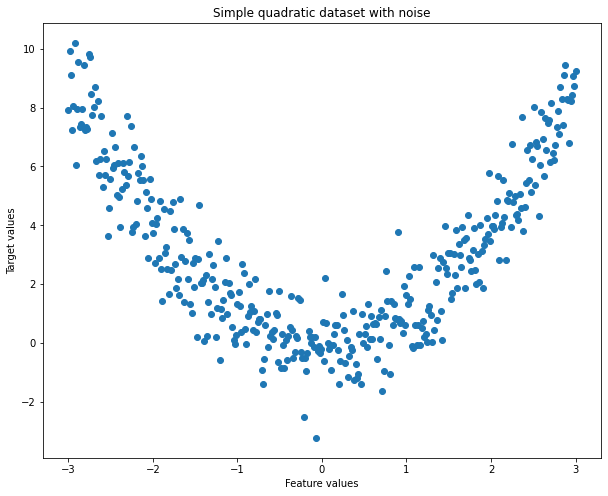

In [3]:
X = np.linspace(-3, 3, 400)
y = X ** 2 + np.random.randn(400)

plt.figure(figsize=(10,8))
plt.scatter(X, y)
plt.title("Simple quadratic dataset with noise")
plt.xlabel("Feature values")
plt.ylabel("Target values")

In [5]:
X = X[:, np.newaxis]

# Split the data into a training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [8]:
 class DecisionTree:
    """
    Decision tree for regression
    """

    def __init__(self):
        self.root_dict = None
        self.tree_dict = None

    def split_dataset(self, X, y, feature_idx, threshold):
        """
        Splits dataset X into two subsets, according to a given feature
        and feature threshold.

        Args:
            X: 2D numpy array with data samples
            y: 1D numpy array with labels
            feature_idx: int, index of feature used for splitting the data
            threshold: float, threshold used for splitting the data

        Returns:
            splits: dict containing the left and right subsets
            and their labels
        """

        left_idx = np.where(X[:, feature_idx] < threshold)
        right_idx = np.where(X[:, feature_idx] >= threshold)

        left_subset = X[left_idx]
        y_left = y[left_idx]

        right_subset = X[right_idx]
        y_right = y[right_idx]

        splits = {
        'left': left_subset,
        'y_left': y_left,
        'right': right_subset,
        'y_right': y_right,
        }

        return splits

    def mean_squared_error(self, y_left, y_right, n_left, n_right):
        """
        Computes MSE of a split.

        Args:
            y_left, y_right: target values of samples in left/right subset
            n_left, n_right: number of samples in left/right subset

        Returns:
            mse_left: float, MSE of left subset
            mse_right: gloat, MSE of right subset
        """

        mse_left, mse_right = 0, 0

        if len(y_left) != 0:
            y_hat_left = (1 / n_left) * np.sum(y_left)
            mse_left = (1 / n_left) * np.sum((y_left - y_hat_left) ** 2)

        if len(y_right) != 0:
            y_hat_right = (1 / n_right) * np.sum(y_right)
            mse_right = (1 / n_right) * np.sum((y_right - y_hat_right) ** 2)

        return mse_left, mse_right

    def get_cost(self, splits):
        """
        Computes cost of a split given the MSE of the left
        and right subset and the sizes of the subsets.

        Args:
            splits: dict, containing params of current split
        """
        y_left = splits['y_left']
        y_right = splits['y_right']

        n_left = len(y_left)
        n_right = len(y_right)
        n_total = n_left + n_right

        mse_left, mse_right = self.mean_squared_error(y_left, y_right, n_left, n_right)
        cost = (n_left / n_total) * mse_left + (n_right / n_total) * mse_right

        return cost

    def find_best_split(self, X, y):
        """
        Finds the best feature and feature index to split dataset X into
        two groups. Checks every value of every attribute as a candidate
        split.

        Args:
            X: 2D numpy array with data samples
            y: 1D numpy array with labels

        Returns:
            best_split_params: dict, containing parameters of the best split
        """

        n_samples, n_features = X.shape
        best_feature_idx, best_threshold, best_cost, best_splits = np.inf, np.inf, np.inf, None

        for feature_idx in range(n_features):
            for i in range(n_samples):
                current_sample = X[i]
                threshold = current_sample[feature_idx]
                splits = self.split_dataset(X, y, feature_idx, threshold)
                cost = self.get_cost(splits)

                if cost < best_cost:
                    best_feature_idx = feature_idx
                    best_threshold = threshold
                    best_cost = cost
                    best_splits = splits

        best_split_params = {
            'feature_idx': best_feature_idx,
            'threshold': best_threshold,
            'cost': best_cost,
            'left': best_splits['left'],
            'y_left': best_splits['y_left'],
            'right': best_splits['right'],
            'y_right': best_splits['y_right'],
        }

        return best_split_params


    def build_tree(self, node_dict, depth, max_depth, min_samples):
        """
        Builds the decision tree in a recursive fashion.

        Args:
            node_dict: dict, representing the current node
            depth: int, depth of current node in the tree
            max_depth: int, maximum allowed tree depth
            min_samples: int, minimum number of samples needed to split a node further

        Returns:
            node_dict: dict, representing the full subtree originating from current node
        """
        left_samples = node_dict['left']
        right_samples = node_dict['right']
        y_left_samples = node_dict['y_left']
        y_right_samples = node_dict['y_right']

        if len(y_left_samples) == 0 or len(y_right_samples) == 0:
            node_dict["left_child"] = node_dict["right_child"] = self.create_terminal_node(np.append(y_left_samples, y_right_samples))
            return None

        if depth >= max_depth:
            node_dict["left_child"] = self.create_terminal_node(y_left_samples)
            node_dict["right_child"] = self.create_terminal_node(y_right_samples)
            return None

        if len(right_samples) < min_samples:
            node_dict["right_child"] = self.create_terminal_node(y_right_samples)
        else:
            node_dict["right_child"] = self.find_best_split(right_samples, y_right_samples)
            self.build_tree(node_dict["right_child"], depth+1, max_depth, min_samples)

        if len(left_samples) < min_samples:
            node_dict["left_child"] = self.create_terminal_node(y_left_samples)
        else:
            node_dict["left_child"] = self.find_best_split(left_samples, y_left_samples)
            self.build_tree(node_dict["left_child"], depth+1, max_depth, min_samples)

        return node_dict

    def create_terminal_node(self, y):
        """
        Creates a terminal node.

        Args:
            y: 1D numpy array with target values
        Returns:
            predicted_value: float, predicted value
        """
        return np.mean(y)

    def train(self, X, y, max_depth, min_samples):
        """
        Fits decision tree on a given dataset.

        Args:
            X: 2D numpy array with data samples
            y: 1D numpy array with labels
            max_depth: int, maximum allowed tree depth
            min_samples: int, minimum number of samples needed to split a node further
        """
        self.n_classes = len(set(y))
        self.root_dict = self.find_best_split(X, y)
        self.tree_dict = self.build_tree(self.root_dict, 1, max_depth, min_samples)

    def predict(self, X, node):
        """
        Predicts the class for a given input example X.

        Args:
            X: 1D numpy array, input example
            node: dict, representing trained decision tree

        Returns:
            prediction: float, predicted value
        """
        feature_idx = node['feature_idx']
        threshold = node['threshold']

        if X[feature_idx] < threshold:
            if isinstance(node['left_child'], (float)):
                return node['left_child']
            else:
                prediction = self.predict(X, node['left_child'])
        elif X[feature_idx] >= threshold:
            if isinstance(node['right_child'], (float)):
                return node['right_child']
            else:
                prediction = self.predict(X, node['right_child'])

        return prediction

In [9]:
tree = DecisionTree()
tree.train(X_train, y_train, max_depth=2, min_samples=2)

In [10]:

def print_tree(node, depth=0):
    if isinstance(node, (float)):
        print(f"{depth * '  '}predicted class: {round(node, 3)}")
    else:
        print(f"{depth * '  '} feature {node['feature_idx']} < {round(node['threshold'], 3)}, "
             f"cost of split: {round(node['cost'], 3)}")
        print_tree(node["left_child"], depth+1)
        print_tree(node["right_child"], depth+1)

In [11]:
print_tree(tree.tree_dict)

 feature 0 < -2.053, cost of split: 5.829
   feature 0 < -2.639, cost of split: 1.105
    predicted class: 8.152
    predicted class: 5.674
   feature 0 < 1.947, cost of split: 2.45
    predicted class: 1.309
    predicted class: 6.105


In [12]:
mse = 0
predictions = []
for i in range(X_test.shape[0]):
    result = tree.predict(X_test[i], tree.tree_dict)
    mse += (y_test[i] - result) ** 2
    predictions.append(result)


mse = (1 / len(y_test)) * mse
print(f"MSE on test set: {round(mse, 3)}")

MSE on test set: 2.464


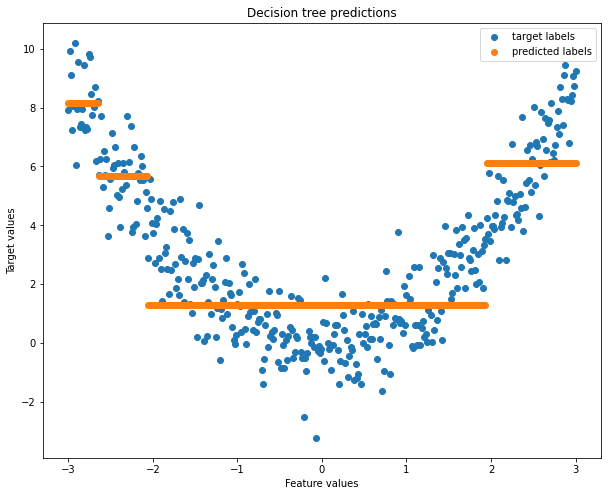

In [13]:
predictions = []
for i in range(X.shape[0]):
    result = tree.predict(X[i], tree.tree_dict)
    predictions.append(result)

plt.figure(figsize=(10, 8))
plt.title("Decision tree predictions")
plt.xlabel("Feature values")
plt.ylabel("Target values")
plt.scatter(X, y, label="target labels")
plt.scatter(X, predictions, label="predicted labels")
plt.legend(loc='upper right')
plt.show()